In [8]:
# Use this to turn into a reveal.js html presentation
# ipython nbconvert Weeks3-5.ipynb --to slides --post serve

import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Neural Networks: Representation

## Non-linear hypotheses

Neural networks is an old idea, but fell out of favor for a while.

Consider a supervised learning problem that looks something like this:



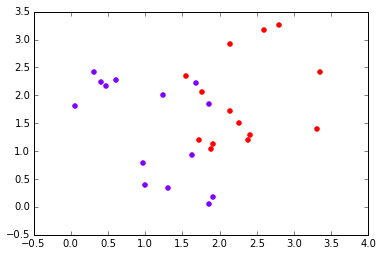

In [9]:
import matplotlib.cm as cm

n = 14
x1 = 2 * np.random.rand(1,n)
x2 = 2 * np.random.rand(1,n) + 1.5
xs_linear = np.array([x1, x2])

y1 = 2.5 * np.random.rand(1,n)
y2 = 2.5 * np.random.rand(1,n) + 1
ys_linear = np.array([y1, y2])

colors = cm.rainbow(np.linspace(0, 1, len(ys_linear)))
for x, y, c in zip(xs_linear, ys_linear, colors):
    plt.scatter(x, y, color=c)
plt.show()

You could try to apply logistic regression to the above problem.  One thing you could do is try to apply logistic regression with a lot of nonlinear features:

$$ g(\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2x_2 + \theta_5x_1^3x_2 + \theta_6x_1x_2^2 + ... ) $$

Where $g()$ is the sigmoid function as before.  A decision boundary could be created with:

$$h_\theta(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2x_2 + \theta_5x_1^3x_2 + \theta_6x_1x_2^2)$$

And initial guess of parameters:

$$
\theta = 
\begin{bmatrix}
-4\cr
1\cr
1\cr
1\cr
1\cr
1\cr
1\cr
\end{bmatrix}$$

Predict $y=1$ if 

$$\theta^T x \geq 0$$

Where

$$
x \in 
\begin{bmatrix}
1\cr
x_1\cr
x_2\cr
x_1x_2\cr
x_1^2x_2\cr
x_1^3x_2\cr
x_1x_2^2\cr
\end{bmatrix}, y \in \{0,1\}$$

So I just need to plot:

$$ 0 = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2x_2 + \theta_5x_1^3x_2 + \theta_6x_1x_2^2$$


###I have this set up to go below, I just don't know how to plot such a non-linear relation.  Definitely not a function.

$$0 = (\theta_6x_1)x_2^2 + (\theta_2 + \theta_3x_1 + \theta_4x_1^2 + \theta_5x_1^3)x_2 + (\theta_0 + \theta_1x_1)$$

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.58362555e+00   1.39173558e+00   1.74720282e+00   1.07357636e+00
    1.78893468e-01   1.55748547e+00   1.83101239e+00   1.13005506e+00
    7.98106457e-01   4.25527358e-01   1.57516372e+00   6.36968772e-01
    2.25960672e-02   2.72852865e-01   3.24288485e+00   2.70849229e+00
    3.04830246e+00   1.77774356e+00   2.73070729e+00   2.89534862e+00
    2.56928335e+00   1.80452522e+00   1.93731264e+00   1.63918456e+00
    2.75432487e+00   2.31916682e+00   2.16321229e+00   2.07831349e+00]
 [  1.78572582e+00

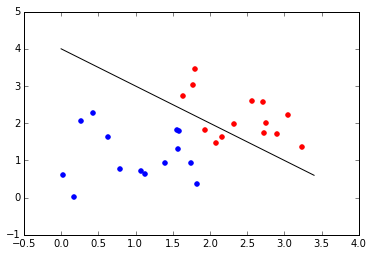

In [10]:
### Non-linear decision boundary example - with gradient descent
import matplotlib.cm as cm

# m data points
m = 28
# J raw features (like x_1, x_2)
J = 2

# J + 5 features, since we will use a crazy assortment of mixed polynomial terms
x = np.zeros((J+5,m))
x[0] = 1
#print x

# Initial guesses for features
theta = np.array([-4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

y_0 = np.zeros((1,m/2))[0]
y_1 = np.ones((1,m/2))[0]
y = np.hstack((y_0, y_1))
#print y

for i in range(m):
    x[1][i] = 2 * np.random.rand(1,1) + 1.5 * y[i]
for i in range(m):
    x[2][i] = 2.5 * np.random.rand(1,1) + 1 * y[i]
for i in range(m):
    x[3][i] = x[1][i] * x[2][i]
    x[4][i] = x[1][i]**2 * x[2][i]
    x[5][i] = x[1][i]**3 * x[2][i]
    x[6][i] = x[1][i] * x[2][i] **2
print x


linex = np.arange(0, 3.5, 0.2)
liney = (- theta[1] * linex - theta[0] * 1) / theta[2]
plt.plot(linex, liney, color='k')
for x1, x2, yi in zip(x[1], x[2], y):
    if yi: plt.scatter(x1, x2, color='r')
    else: plt.scatter(x1, x2, color='b')

plt.show()

But at any rate, this is very hard to do when you have many features $(x_1, x_2, ..., x_{100})$ to work with.  For one, it's very hard to visualize, and you'll have tons of features.

With $n = 100$, you'll have approximately $5000$ features of $O(n^2)$ terms.  (This is approximately $\frac{n^2}{2}$ terms.)

 Example of computer vision.
 
 Where you and I see a car, a computer just sees a matrix of pixel values.
 
 When we use machine learning to recognize cars, we give the computer a training set and train a network to decide if it is looking at a car.

What is the dimension of the feature space?

If we just have a $50 x 50$ pixel image, then we have $2500$ pixels.

$n = 2500 \ \ \ \ $ (7500 if RGB).


$$ x = 
\begin{bmatrix}
\text{pixel 1 intensity}\cr
\text{pixel 2 intensity}\cr
.\cr
.\cr
.\cr
\text{pixel 2500 intensity}
\end{bmatrix}$$

So we'd have a big vector of all of the pixel intensities, and that's just if it's grayscale.  If it's RGB then we'll have 7500 elements in our vector.

If we were to try to learn a non-linear hypothesis with just the quadratic features $(x_i * x_j)$, that would be approximately 3 million features.

In [11]:
print 'number of quadratic features is ' + str(2500**2/2)

number of quadratic features is 3125000


So simple logistic regression, with maybe adding in quadratic features, turns out to be an intractable way to learn complicated non-linear hypotheses.

Neural networks turn out to be a much better way to learn complicated non-linear hyptoheses when n is large.

## Neurons and the Brain

### Neural Networks

Origins: Algorithms that try to mimic the brain.

Was very widely used in the 80s and early 90s; popularity diminished in the late 90s.

Recent resurgence: state-of-the-art technique for many applications.

#### Look into Roe et al., 1992 to read about the auditory cortex learning to see.

Animals can look at images and make discrimination and they're doing it with the auditory cortex part of the brain tissue.

#### Look into Metin & Frost, 1989 to read about the somatosensory cortex learning to see

#### Look into BrainPort where you can learn to see with your tongue
(Currently undergoing FDA trials to help blind people see)
- Strap a grayscale camera to your forehead
- Run a wire to an array of electrodes on your tongue
- You and I can learn to see in 10s of minutes
- Look into a kid who can see just by snapping

A frog will also learn how to see with a third eye.

Neural nets are also state of the art for many different applications.


## Neural Nets: Model Representation I

- Neurons have an input wire (called a _Dendrite_)
- Neurons have an output wire (called an _Axon_)

We will use a logistic unit neuron model.  We then feed the neuron some input wires, and have an output wire which is our sigmoid function.

$$ x = \begin{bmatrix}
x_0\cr
x_1\cr
x_2\cr
x_3
\end{bmatrix},
\theta = \begin{bmatrix}
\theta_0\cr
\theta_1\cr
\theta_2\cr
\theta_3
\end{bmatrix}$$

$$h_{\theta}(x) = \frac{1}{1+e^{-\theta^Tx}} $$

Note that $x_0$ is always equal to 1.  Sometimes called the bias unit.

In neural network terminology, "weights" means the same as parameters.  It's just the parameters for the linear combinations.



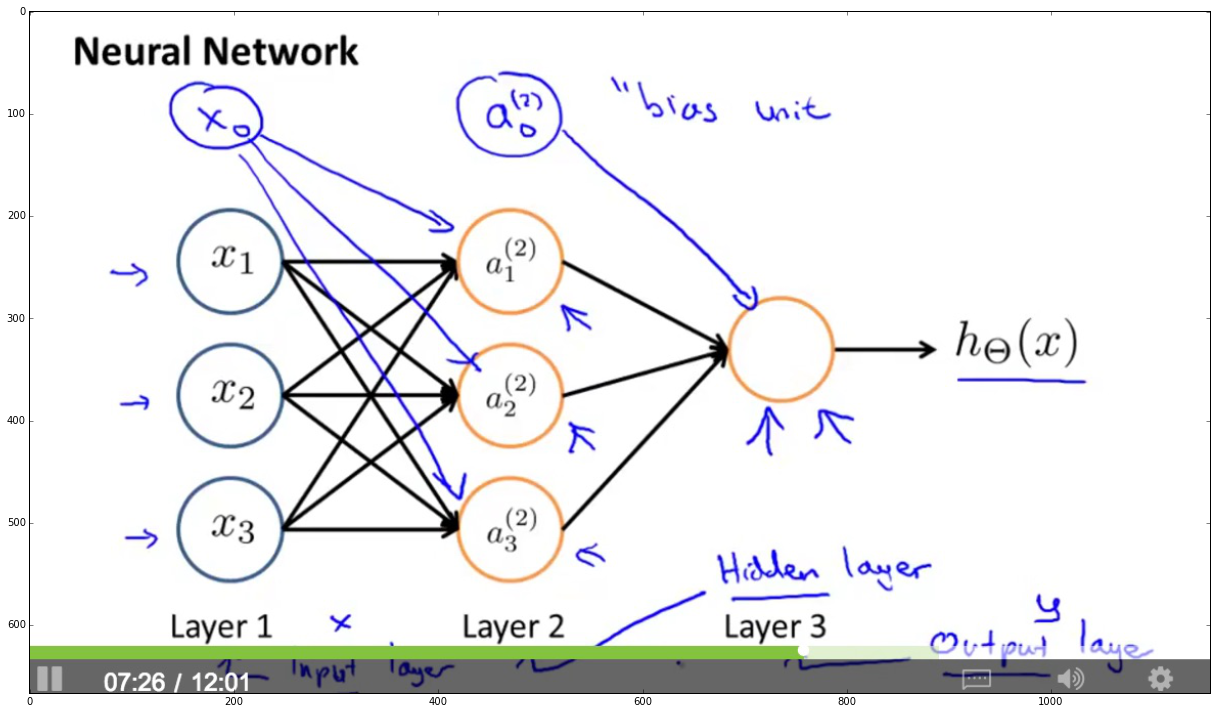

In [12]:
from scipy.misc import imread, imresize

img = imread('./assets/simplenet.jpg')
fig0, ax0 = plt.subplots(figsize=(18,10))
ax0.imshow(img)
plt.tight_layout()


# Figuring out how to plot nice figures

# grid = np.random.random((10,10))
# fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(6,10))

# ax1.imshow(grid, extent=[0,100,0,1])
# ax1.set_title('Default')

# ax2.imshow(grid, extent=[0,100,0,1], aspect='auto')
# ax2.set_title('Auto-scaled Aspect')

# ax3.imshow(grid, extent=[0,100,0,1], aspect=100)
# ax3.set_title('Manually Set Aspect')

# plt.tight_layout()
# plt.show()

# fig, ax = plt.subplots(figsize=(18, 2))
# ax.imshow(random.rand(8, 90), interpolation='nearest')
# plt.tight_layout()

- First layer is called the _input layer_.
- Final layer is called the _output layer_.
- Any layers in between are called _hidden layers_.

$a_i^{(j)} =$ activation of unit $i$ in layer $j$

$\Theta^{(j)} =$ matrix of weights controlling function mapping from layer $j$ to layer $j+1$

If we have a neural network with 3 input units, just 1 hidden layer of 3 units, and one output unit, then we have:

$$a_1^{(2)} = g(\Theta^{(1)}_{10}x_0 + \Theta^{(1)}_{11}x_1 + \Theta^{(1)}_{12}x_3 + \Theta^{(1)}_{13}x_3)$$

$$a_2^{(2)} = g(\Theta^{(1)}_{20}x_0 + \Theta^{(1)}_{21}x_1 + \Theta^{(1)}_{22}x_3 + \Theta^{(1)}_{33}x_3)$$

$$a_3^{(2)} = g(\Theta^{(1)}_{30}x_0 + \Theta^{(1)}_{31}x_1 + \Theta^{(1)}_{32}x_3 + \Theta^{(1)}_{33}x_3)$$

$$h_{\Theta}(x) = a_1^{(3)}=g(\Theta^{(2)}_{10}a^{(2)}_0 + \Theta^{(2)}_{11}a^{(2)}_1 + \Theta^{(2)}_{12}a^{(2)}_2 + \Theta^{(2)}_{13}a^{(2)}_3)$$

$$\Theta^{(1)} \in \mathbb{R}^{3x4}$$

If network has $s_j$ units in layer $j$, $s_{j+1}$ units in layer $j+1$, then $\Theta^{(j)}$ will be of dimension $s_{j+1} \times (s_j + 1)$.





## Neural Nets: Model Representation II

- Show vectorized implementation
- Previously we said we needed to use the equations above.

### Forward propagation: vectorized implementation

- Use $z_1^{(2)}$ as short for the above.

$$   a_1^{(2)} = g(z_1^{(2)} )        $$
$$   a_2^{(2)} = g(z_2^{(2)} )        $$
$$   a_3^{(2)} = g(z_3^{(2)} )        $$

Let's define the vector $x$ and the vector $z^{(2)}$:

$$ x = \begin{bmatrix}
x_0\cr
x_1\cr
x_2\cr
x_3
\end{bmatrix},
z^{(2)} = \begin{bmatrix}
z_1^{(2)}\cr
z_2^{(2)}\cr
z_3^{(2)}
\end{bmatrix}$$


We can now vectorize the computation:

$$ z^{(2)} = \Theta^{(1)}x$$
$$a^{(2)} = g(z^{(2)})$$

Set $a^{(1)} = x$

$$ z^{(2)} = \Theta^{(1)}a^{(1)}$$
$$a^{(2)} = g(z^{(2)})$$

Where both $a^{(2)}$ and $g(z^{(2)})$ are in $\mathbb{R}^3$

To take care of the bias unit, add $a_0^{(2)} = 1$.

After adding in $a_0$, we now have $a^{(2)} \in \mathbb{R}^4$

$$z^{(3)} = \Theta^{(2)}a^{(2)}$$
$$h_{\Theta}(x) = a^{(3)} = g(z^{(3)})$$

The neural network is just like logistic regression, but instead of using $x_1, x_2, x_3$, it is using these new features $a_1^{(2)}, a_2^{(2)}, a_3^{(2)}$

Rather than being constrained to $x_1, x_2, x_3$, the neural network gets to learn its own features.

### Other network architectures

Obviously can have more than just one hidden layer, and can have many inputs.


## Examples and Intuitions I

### Non-linear classification example: XOR/XNOR

- $x_1$, $x_2$ are binary (0 or 1)

Simple example: AND


$$h_{\Theta}(x) = g(-30 + 20x_1 + 20x_2)$$

$$g(-30) = 0$$
$$g(-10) = 0 $$
$$g(-10)=0 $$
$$g(10)=1 $$

Simple example: OR

$$h_{\Theta}(x) = g(-10 + 20x_1 + 20x_2)$$

### Multiclass classification

Output is a vector where one of the elements of the vector is a 1 for truck, another is a 1 for car, etc.

# Programming Assignment: Multi-class Classification and Neural Networks

## Cost Function

### Neural network (Classification)

We have a neural net with 

$ L = $ total no. of layers in the network

$s_l = $ no. of units (not counting bias unit) in layer $l$



#### Binary classifcation

$y = 0 \text{ or } 1$

1 output unit

$h_{\Theta}(x) \in \mathbb{R}$

$s_L = 1, K = 1$

#### Multi-class classification (K classes)

$y \in \mathbb{R}^K$

K output units

$h_{\Theta}(x) \in \mathbb{R}^K$

$S_L = K$, $(k \geq 3)$

### Cost function

Logistic Regression

$$J(\Theta) = - \frac{1}{m} \Big[ \sum_{i=1}^{m} y^{(i)} \log h_{\theta}(x^{(i)}) + (1 - y^{(i)})\log(1-h_{\theta}(x^{(i)})) \Big] + \frac{\lambda}{2m} \sum_{j=1}^{n}\theta_j^2$$

Our neural network cost function will be a generalization of this cost function, where instead of having 1 output unit we will instead have K of them.

Neural network

$$ h_{\Theta}(x) \in \mathbb{R}^K  \ \ \ \ \ (h_{\Theta}(x))_i = i^{th} \text{output}$$

$$ J(\Theta) = - \frac{1}{m} \Big[ \sum_{i=1}^{m}  \sum_{k=1}^K y_k^{(i)}  \log (h_{\Theta}(x^{(i)}))_k + (1 - y_k^{(i)})\log(1-(h_{\theta}(x^{(i)}))_k) \Big] + \frac{\lambda}{2m} \sum_{l=1}^{L-1}  \sum_{i=1}^{s_l}     \sum_{j=1}^{s_{l+1}} (\Theta_{ji}^{(l)})^2 $$


## Backpropagation algorithm

Gradient computation

$$ J(\Theta) = - \frac{1}{m} \Big[ \sum_{i=1}^{m}  \sum_{k=1}^K y_k^{(i)}  \log (h_{\Theta}(x^{(i)}))_k + (1 - y_k^{(i)})\log(1-(h_{\theta}(x^{(i)}))_k) \Big] + \frac{\lambda}{2m} \sum_{l=1}^{L-1}  \sum_{i=1}^{s_l}     \sum_{j=1}^{s_{l+1}} (\Theta_{ji}^{(l)})^2 $$

$\underset { \theta} {min}  \ J(\theta)$

Need code to compute:

- $J(\Theta)$
- $\frac{\partial}{\partial\Theta_{ij}^{(l)}}J(\Theta)$

$\Theta_{ij}^{(l)} \in \mathbb{R}$

## How to compute the gradient

Given one training example: $(x,y)$

Step one: forward propagation

$a^{(1)} = x $

$z^{(2)} = \Theta^{(1)}a^{(1)}$

$ a^{(2)} = g(z^{(2}) \ \ \ (\text{add} \ \ a_0^{(2)} ) $

$ z^{(3)} = \Theta^{(2)}a^{(2)}  $

$ a^{(3)} = g(z^{(3)}) \ \ \ (\text{add} \ \ a_0^{(3)} )  $  

$ z^{(4)} = \Theta^{(3)}a^{(3)}$

$ a^{(4)} = h_{\Theta}(x) = g(z^{(4)}) $



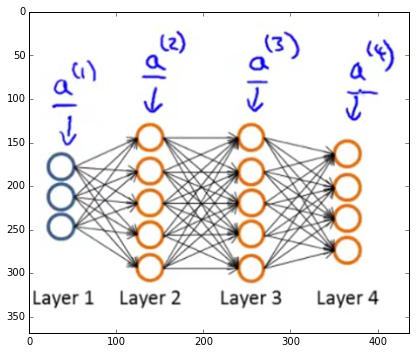

In [13]:
img = imread('./assets/4layers.jpg')
fig0, ax0 = plt.subplots(figsize=(8,5))
ax0.imshow(img)
plt.tight_layout()

Step two: compute backpropagation
    
Intuition is that for each node we will compute the "error of node $j$ in layer $l$ = $\delta_j^{(l)} $

For each output unit (layer L = 4)

$$ \delta_j^{(4)} = a_j^{(4)} - y_j $$

Vectorized 

$$ \delta^{(4)} = a^{(4)} - y $$

Then errors for other layers

$$ \delta^{(3)} = (\Theta^{(3)})^T\delta^{(4)}.*g'(z^{(3)})  $$  where .* is element-wise multiplication from MATLAB
$$ \delta^{(2)} = (\Theta^{(2)})^T\delta^{(3)}.*g'(z^{(2)})  $$  

$g'$ are derivative terms

$g'(z^{(3)}) = a^{(3)} .* (1 - a{(3)})$

$g'(z^{(2)}) = a^{(2)} .* (1 - a{(2)})$

####Backpropagation algorithm

... come back later and fill in ...

FP using $x^{(1)}$ followed by BP using $y^{(1)}$.  Then FP using $x^{(2)}$ followed by BP using $y^{(2)}$.

#### Backpropagation intuition

Backprop is a less mathematically clean algorithm than linear regression, etc.

This lecture tries to give some intuition...

#### Gradient checking

Do it

#### Symmetry breaking

Do this too

### Putting it together

First need to pick a network architecture

No. of input units: dimension of features $x^{(i)}$
No. of output units: number of classes

#### Training a neural network

1. Randomly initialize weights
2. Implemenet forward propagation to get $h_{\Theta}(x^{(i)})$ for any $x^{(i)}$
3. Implement code to compute cost function J(\Theta)
4. Implemenet backprop to compute partial derivatives $\frac{\partial}{\partial\Theta_{jk}^{(l)}}J(\Theta)$
5. Use gradient checking to compare $\frac{\partial}{\partial\Theta_{jk}^{(l)}}J(\Theta)$ computed using backprop vs. using numerical estimate of gradient of $J(\Theta)$
6. Use gradient descent or advanced optimization method with backprop to try to minimize J(\Theta) as a function of parameters



